# Vodafone Customer Attrition Predictor

### `Business Understanding`


#### **Problem Statement:** Vodafone is facing a growing challenge with customer attrition. This rising churn rate poses a threat to the company's operational efficiency and future growth. 

#### **Project Goal:** The aim of the project is to to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

#### **Stakeholders:** 
 - Vodafone
 - Business Team
 - Marketing Team


#### **Key Metrics and Success Criteria**
 - The model should have an accuracy score of 85%(on balanced data)
 - Good models are expected to have an F1 score of > 0.80 or 80%
 - There should be atleast 4 Baseline models
 - All hyperparameter tuning should only be applied to baseline models if they exceed their F1 score
 - An ROC Curver of 80% is ideal for the model to generalize 



#### **Features**
- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)




##### **Null Hypothesis:** There is no statistically significant relationship between customer demographics, service usage patterns, contract details, and the likelihood of customer churn at Vodafone.


##### **Alternate Hypothesis:** There is a statistically significant relationship between customer demographics, service usage patterns, contract details, and the likelihood of customer churn at Vodafone.



##### **Analytical Questions:**
1. Which customer demographics are most strongly associated with churn, and how do factors like age, gender, and senior citizenship status influence churn rates?

2. How does the duration of customer tenure influence the likelihood of churn, and is there a specific tenure period during which customers are more likely to leave?

3. What is the impact of different service types (e.g., DSL, Fiber Optic, no internet service) on customer churn, and which services are most closely associated with higher churn rates?

4. How do contract terms (e.g., month-to-month, one-year, two-year) and billing preferences (e.g., paperless billing) affect customer churn rates?

5. What role do additional services (e.g., online security, tech support, streaming TV, streaming movies) play in influencing customer churn, and which of these services are most effective in retaining customers?






### `DATA UNDERSTANDING`

### **Importations**

In [1]:
# Data Manipulation packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import KNNImputer

### **Importation to Connect to Server**

In [2]:
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import warnings 

warnings.filterwarnings('ignore')

### **Load Dataset**

In [3]:
# Connecting to the Dataset
df1 = pd.read_csv('..\\data\\LP2_Telco-churn-second-2000.csv')



# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("username")
password = environment_variables.get("password")


# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


# Establish the connection

connection = pyodbc.connect(connection_string)

#### **Inspecting Columns In Csv**

In [4]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### **Inspecting Columns In Database**

In [6]:
query = "SELECT * FROM LP2_Telco_churn_first_3000"

df2 = pd.read_sql(query, connection)

df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


#### **Function to Standardize Values:**

In [8]:
def standardize_values(df, column, true_val, false_val):
    df[column] = df[column].replace({true_val: 1, false_val: 0})
    return df

# List of columns to standardize
columns_to_standardize = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                          'MultipleLines', 'OnlineSecurity', 'DeviceProtection', 
                          'TechSupport', 'StreamingTV', 'StreamingMovies', 
                          'PaperlessBilling', 'Churn']

# Standardize values in df1
for col in columns_to_standardize:
    df1 = standardize_values(df1, col, 'Yes', 'No')

# Standardize values in df2
for col in columns_to_standardize:
    df2 = standardize_values(df2, col, True, False)


#### **Merging The Dataset:**

In [9]:
df_merged = pd.merge(df1, df2, on='customerID', how='outer')

### **Exploratory Data Analysis**

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          5043 non-null   object 
 1   gender_x            2043 non-null   object 
 2   SeniorCitizen_x     2043 non-null   float64
 3   Partner_x           2043 non-null   float64
 4   Dependents_x        2043 non-null   float64
 5   tenure_x            2043 non-null   float64
 6   PhoneService_x      2043 non-null   float64
 7   MultipleLines_x     2043 non-null   object 
 8   InternetService_x   2043 non-null   object 
 9   OnlineSecurity_x    2043 non-null   object 
 10  OnlineBackup_x      2043 non-null   object 
 11  DeviceProtection_x  2043 non-null   object 
 12  TechSupport_x       2043 non-null   object 
 13  StreamingTV_x       2043 non-null   object 
 14  StreamingMovies_x   2043 non-null   object 
 15  Contract_x          2043 non-null   object 
 16  Paperl

In [11]:
# Identifying Duplicate Columns
# Decide which columns to drop based on inspection
duplicate_columns = ['gender_x', 'SeniorCitizen_x', 'Partner_x', 'Dependents_x', 'tenure_x',
                     'PhoneService_x', 'MultipleLines_x', 'InternetService_x', 'OnlineSecurity_x',
                     'OnlineBackup_x', 'DeviceProtection_x', 'TechSupport_x', 'StreamingTV_x',
                     'StreamingMovies_x', 'Contract_x', 'PaperlessBilling_x', 'PaymentMethod_x',
                     'MonthlyCharges_x', 'TotalCharges_x', 'Churn_x']

In [12]:
# Drop the identified duplicate columns
df_merged.drop(duplicate_columns, axis=1, inplace=True)

# Rename columns to remove _y suffix
df_merged.columns = df_merged.columns.str.replace('_y', '')

# Check the final merged DataFrame
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   float64
 3   Partner           3000 non-null   float64
 4   Dependents        3000 non-null   float64
 5   tenure            3000 non-null   float64
 6   PhoneService      3000 non-null   float64
 7   MultipleLines     2731 non-null   float64
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   float64
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   float64
 12  TechSupport       2349 non-null   float64
 13  StreamingTV       2349 non-null   float64
 14  StreamingMovies   2349 non-null   float64
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   float64


In [13]:
# Separate binary columns and continuous columns
binary_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

continuous_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Separate the DataFrame
df_binary = df_merged[binary_columns]
df_continuous = df_merged[continuous_columns]
df_rest = df_merged.drop(binary_columns + continuous_columns, axis=1)




In [14]:
# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Impute binary columns
imputed_binary = knn_imputer.fit_transform(df_binary)
df_imputed_binary = pd.DataFrame(imputed_binary, columns=binary_columns)

# Impute continuous columns
imputed_continuous = knn_imputer.fit_transform(df_continuous)
df_imputed_continuous = pd.DataFrame(imputed_continuous, columns=continuous_columns)


In [15]:
# Convert binary columns back to integers
for col in binary_columns:
    df_imputed_binary[col] = df_imputed_binary[col].round().astype(int)

# Combine the imputed columns back into the original DataFrame
df_final = pd.concat([df_rest.reset_index(drop=True), df_imputed_binary, df_imputed_continuous], axis=1)

# Check the DataFrame after conversion
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            3000 non-null   object 
 2   InternetService   3000 non-null   object 
 3   Contract          3000 non-null   object 
 4   PaymentMethod     3000 non-null   object 
 5   SeniorCitizen     5043 non-null   int32  
 6   Partner           5043 non-null   int32  
 7   Dependents        5043 non-null   int32  
 8   PhoneService      5043 non-null   int32  
 9   MultipleLines     5043 non-null   int32  
 10  OnlineSecurity    5043 non-null   int32  
 11  OnlineBackup      5043 non-null   int32  
 12  DeviceProtection  5043 non-null   int32  
 13  TechSupport       5043 non-null   int32  
 14  StreamingTV       5043 non-null   int32  
 15  StreamingMovies   5043 non-null   int32  
 16  PaperlessBilling  5043 non-null   int32  


In [16]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   float64
 3   Partner           3000 non-null   float64
 4   Dependents        3000 non-null   float64
 5   tenure            3000 non-null   float64
 6   PhoneService      3000 non-null   float64
 7   MultipleLines     2731 non-null   float64
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   float64
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   float64
 12  TechSupport       2349 non-null   float64
 13  StreamingTV       2349 non-null   float64
 14  StreamingMovies   2349 non-null   float64
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   float64


In [17]:
df_merged.duplicated().sum()

0

In [18]:
df_merged.isnull().sum()

customerID             0
gender              2043
SeniorCitizen       2043
Partner             2043
Dependents          2043
tenure              2043
PhoneService        2043
MultipleLines       2312
InternetService     2043
OnlineSecurity      2694
OnlineBackup        2694
DeviceProtection    2694
TechSupport         2694
StreamingTV         2694
StreamingMovies     2694
Contract            2043
PaperlessBilling    2043
PaymentMethod       2043
MonthlyCharges      2043
TotalCharges        2048
Churn               2044
dtype: int64

In [19]:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,3000.0,0.158333,0.365114,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,3000.0,0.487333,0.499923,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,3000.0,0.310000,0.462570,0.000000,0.000000,0.000000,1.000000,1.000000
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
PhoneService,3000.0,0.910333,0.285751,0.000000,1.000000,1.000000,1.000000,1.000000
MultipleLines,2731.0,0.473819,0.499406,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineSecurity,2349.0,0.370796,0.483121,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,2349.0,0.448276,0.497423,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,2349.0,0.371648,0.483348,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingTV,2349.0,0.493401,0.500063,0.000000,0.000000,0.000000,1.000000,1.000000


In [20]:
df_merged.describe(include = 'object').T

,count,unique,top,freq
customerID,5043,5043,0002-ORFBO,1
gender,3000,2,Male,1537
InternetService,3000,3,Fiber optic,1343
OnlineBackup,2349,2,False,1320
Contract,3000,3,Month-to-month,1641
PaymentMethod,3000,4,Electronic check,1004


In [21]:
columns = df_merged.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
for column in columns:
    print(f'{column}')
    unique_values = df_merged[column].unique()
    print(f'There are {unique_values.size} unique values')
    print(f'{unique_values}')
    print('=' * 50)


customerID
There are 5043 unique values
['0002-ORFBO' '0011-IGKFF' '0013-EXCHZ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
gender
There are 3 unique values
['Female' nan 'Male']
SeniorCitizen
There are 3 unique values
[ 0. nan  1.]
Partner
There are 3 unique values
[ 1. nan  0.]
Dependents
There are 3 unique values
[ 1. nan  0.]
tenure
There are 74 unique values
[ 9. nan 71. 63.  7. 54. 72.  1. 45. 50.  3.  4. 55. 69. 37.  2. 25. 35.
 40. 11. 30. 27. 58. 16. 32. 10. 21. 61. 15. 44. 12. 26. 33. 47. 62. 70.
 52.  5. 66. 60. 48. 28. 67. 49. 19. 41.  6. 53. 23. 31. 56. 65. 34. 20.
 46. 59.  8. 22. 24. 18. 57. 51. 13. 42. 17. 68. 38. 64. 14. 43. 39.  0.
 29. 36.]
PhoneService
There are 3 unique values
[ 1. nan  0.]
MultipleLines
There are 3 unique values
[ 0. nan  1.]
InternetService
There are 4 unique values
['DSL' nan 'Fiber optic' 'No']
OnlineSecurity
There are 3 unique values
[ 0. nan  1.]
OnlineBackup
There are 4 unique values
[True nan False None]
DeviceProtection
There are 3 unique

#### **Univariate Analysis**

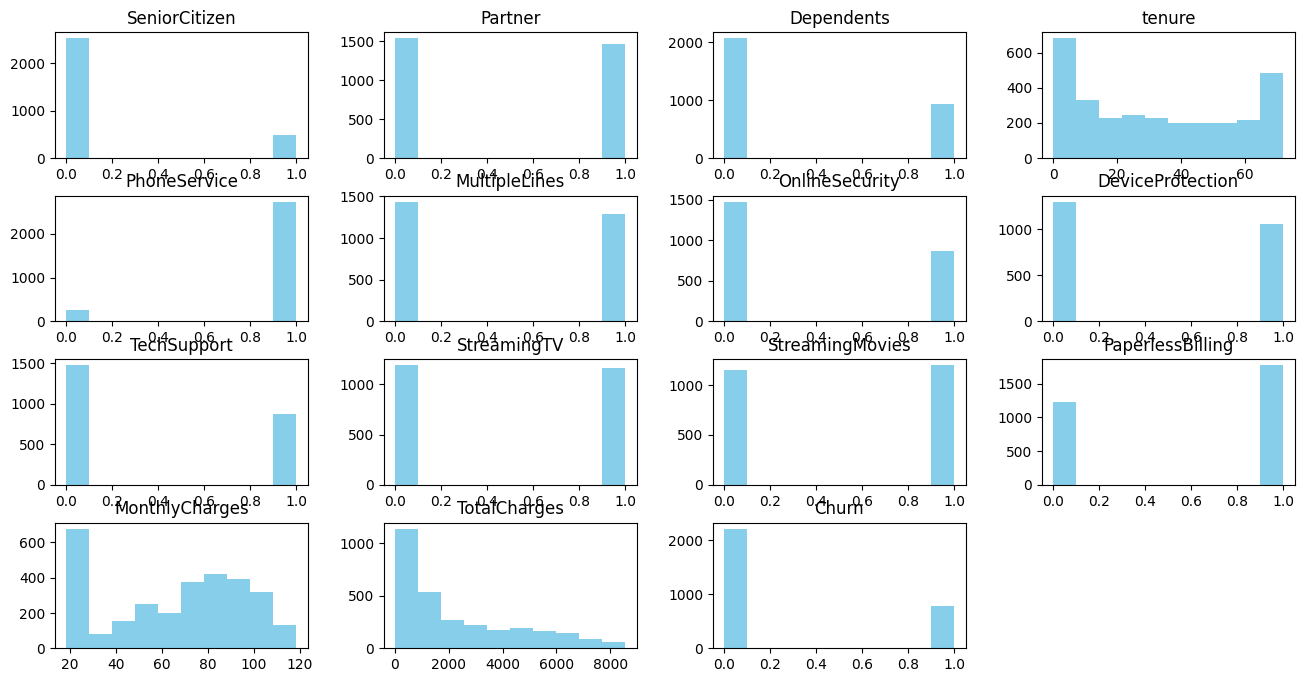

In [23]:
df_merged.hist(figsize=(16,8), grid =False, color='skyblue')
plt.title('Distribution of Numerical Features')
plt.show()

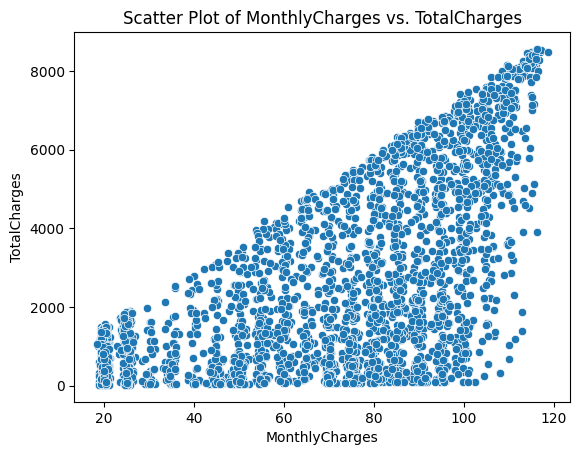

In [24]:
# Scatter plot between two numerical variables, e.g., 'MonthlyCharges' and 'TotalCharges'
sns.scatterplot(data=df_merged, x='MonthlyCharges', y='TotalCharges')
plt.title('Scatter Plot of MonthlyCharges vs. TotalCharges')
plt.show()

This plot shows the relationship between MonthlyCharges and TotalCharges. Since the points form an upward trend, it indicates that as MonthlyCharges increase, TotalCharges also tend to increase.



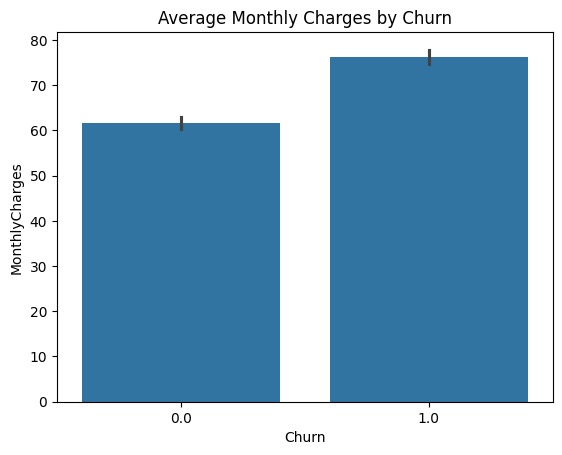

In [25]:
# Bar plot for categorical vs numerical variable
sns.barplot(data=df_merged, x='Churn', y='MonthlyCharges')
plt.title('Average Monthly Charges by Churn')
plt.show()


This plot shows the average MonthlyCharges for customers who churned vs. those who did not. The graph shows that customers who churned tend to have higher MonthlyCharges.

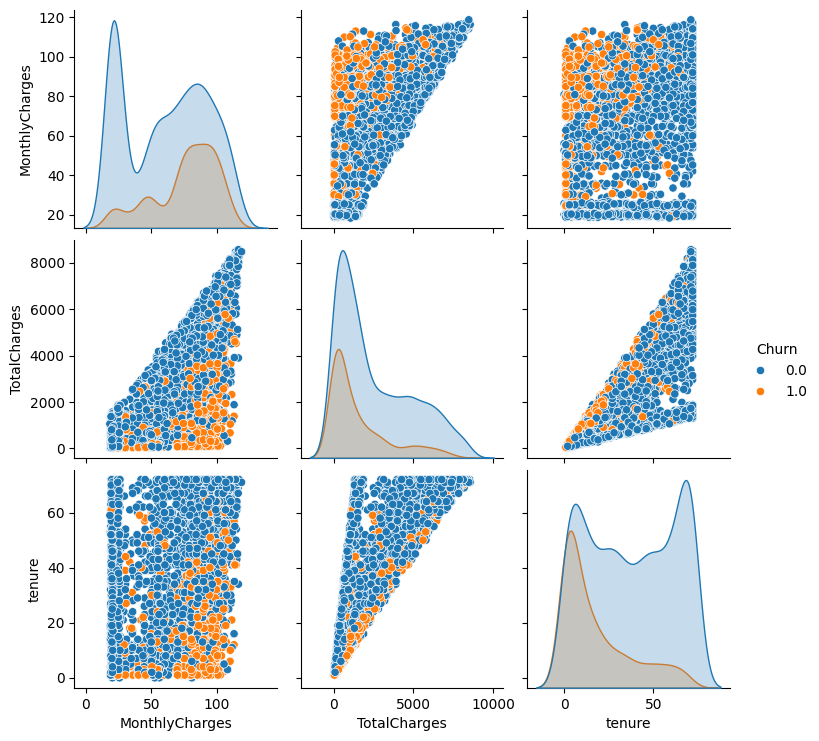

In [26]:
# Pair plot for a subset of columns
sns.pairplot(df_merged[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
plt.show()


This plot helps to see the pairwise relationships and how they differ based on the Churn status. For example, you can observe how tenure and MonthlyCharges relate to each other and to Churn.

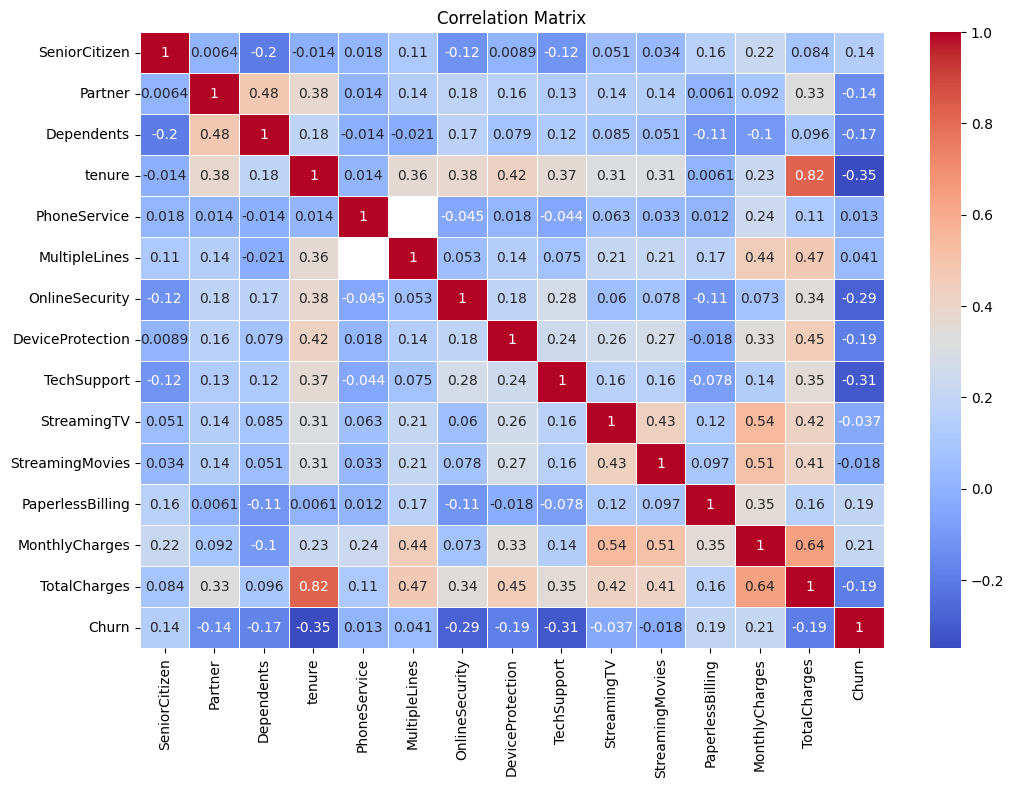

In [27]:
numeric_df = df_merged.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


The heatmap shows the correlation coefficients. For example, if MonthlyCharges and TotalCharges have a high correlation coefficient (close to 1), it means they increase together.

#### Key Insights


1. For the columns where values are represented differently (0 and False, No and True, etc.), I will standardize them to a consistent format across both datasets
2. I will convert all boolean columns to 0 and 1 since numeric representation is often more suitable for machine learning models.
3. The coumns became duplicated with x ones and y ones but the x ones had more missing values so I have to drop the x onnes rather and keep the y ones
4. The categorical conversion to integers was formally in float.
5. Using the KNN Imputer I had to fill all the numerical values and leave the object ones such as Gender, Customer id, Internetservice,contract.
6. There are no duplicated values in the combined dataset
7. Dataset is not evenly distributed